# Challenge 2
This notebok is for challenge 2: MNIST database with Logistic regression

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import time 

## Importing dataset

In [2]:
%matplotlib inline
from sklearn.datasets import fetch_mldata

# Change data_home to wherever to where you want to download your data
data_set = fetch_mldata('MNIST original')

### Checking dataset properties

In [3]:
# Print to show there are 1797 images (8 by 8 images for a dimensionality of 64)
print("Image Data Shape" , data_set.data.shape)

# Print to show there are 1797 labels (integers from 0-9)
print("Label Data Shape", data_set.target.shape)

Image Data Shape (70000, 784)
Label Data Shape (70000,)


#### Print training and testing data shape

In [4]:
#Split train-test into 60k-10k
from sklearn.model_selection import train_test_split

#X=image, y=label
X_train, X_test, y_train, y_test = train_test_split(
    data_set.data, data_set.target, test_size=1/7.0, random_state=0)

In [5]:
print(X_train.shape)
print(y_train.shape)

(60000, 784)
(60000,)


In [6]:
print(X_test.shape)
print(y_test.shape)

(10000, 784)
(10000,)


### Display images and labels

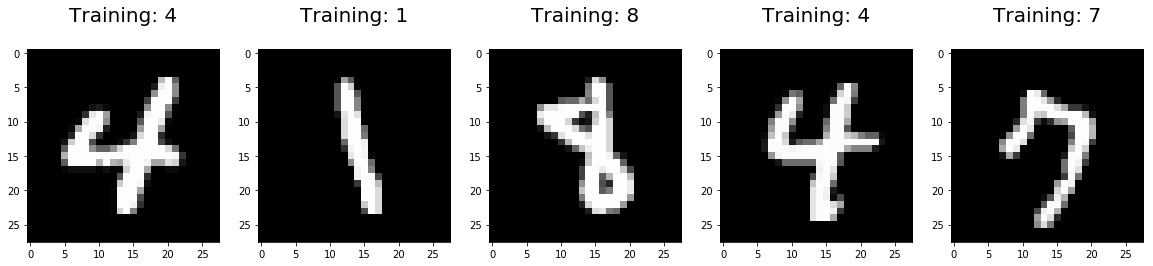

In [7]:
import matplotlib.pyplot as plt

#Training data
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(X_train[0:5], y_train[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

### Modeling: Logistic regression

#### Function to train, predict and measure accuracy for different models
Define Logistic regression classifier with different solvers (all other params are kept default)

In [8]:
#defining function for computing metrics
#we are using accuracy score (using score function) for now
#other possible metrics could be f1 score, precision, recall, roc score, etc.
def compute_score(clf):
    score = clf.score(X_test, y_test)
    print("Accuracy score = "+str(score))

In [9]:
def model_results(solver_name='liblinear'):
    #define the solver
    clf = LogisticRegression(solver=solver_name)
    
    #train
    print("----------Printing statistics------------")
    print(solver_name)
    t0 = time.time()
    clf.fit(X_train, y_train)
    t1 = time.time()
    print("Time taken for classification = "+str(t1-t0))
    
    #predict
    y_pred = clf.predict(X_test)
    
    #Accuracy
    compute_score(clf)

In [10]:
model_results('liblinear')
model_results(solver_name='lbfgs')
model_results('newton-cg')

----------Printing statistics------------
lbfgs
Time taken for classification = 66.83024096488953
Accuracy score = 0.9134


### Display misclassified images

index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, y_pred):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1

plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(X_test[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(y_pred[badIndex], y_test[badIndex]), fontsize = 15)